# Hola Natalia!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!



<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
# Comentario General

Hola Natalia, te felicito por el desarrollo del proyecto. Completaste de manera correcta cada una de las secciones. </div>

# <center> Predicting and Addressing Customer Churn: The case of Model Fitness </center>


### Introduction

The loss of clients is a significant issue, and identifying when a customer is no longer engaged can be complex. While some customers might cancel their memberships or fail to renew their contracts, others may leave quietly, making it less obvious that they have disengaged.

In various fields, indicators of customer churn can differ. For this project, we assume that low attendance within a month could signal disengagement and potential loss.

The aim of this project is to design a machine learning model for a gym named Model Fitness to predict churn probabilities based on key features such as location distance, contract length, and attendance to group classes.

For the model, logistic regression was used as it demonstrated better performance in accuracy, precision, and recall compared to the Random Forest Classifier.

Additionally, a k-means model was applied to classify clients into five clusters: Frequent Spenders, High Risk, Loyal Long Term, Occasional Visitors, and Remote Visitors.

In conclusion, we found that the Loyal Long Term clients, who are more committed (longer contract periods, higher lifetime, frequent class attendance) and have the lowest churn rate, constitute the largest proportion, which is a positive indicator for the gym. However, to decrease churn rates, we could focus on increasing class attendance and extending contract periods through marketing strategies that motivate people to engage in these activities or through promotions for long-term contracts. Additionally, generating attractive strategies for people who live far away from the gym can be beneficial as well.

ES: 

La pérdida de clientes es un problema significativo para multiples industrias e identificar cuándo un cliente ya no está comprometido puede ser complejo, ya que mientras que algunos clientes pueden cancelar sus membresías o no renovar sus contratos, otros pueden irse discretamente y de forma paulatina, haciendo menos obvio que posiblemente cancelarán el plan.

En varios campos, los indicadores de cancelación de clientes pueden diferir, pero para este proyecto, asumimos que una baja asistencia podría señalar desinterés y una posible pérdida.

En este sentido, el objetivo de este proyecto es diseñar un modelo de aprendizaje automático para un gimnasio llamado Model Fitness, que prediga las probabilidades de cancelación según características clave como la distancia de la ubicación, la duración del contrato y la asistencia a clases grupales.

Para el modelo, se utilizó la regresión logística, ya que demostró un mejor rendimiento en precisión, exactitud y sensibilidad en comparación con el clasificador de bosque aleatorio.

Además, se aplicó un modelo de k-means para clasificar a los clientes en cinco grupos: Gastadores Frecuentes, Alto Riesgo, Leales a Largo Plazo, Visitantes Ocasionales y Visitantes Remotos.

En conclusión, encontramos que los clientes Leales a Largo Plazo, que están más comprometidos (períodos de contrato más largos, mayor tiempo de vida, asistencia frecuente a clases) y tienen la tasa de cancelación más baja, constituyen la mayor proporción, lo cual es un indicador positivo para el gimnasio. Sin embargo, para disminuir las tasas de cancelación, podríamos centrarnos en aumentar la asistencia a clases y extender los períodos de contrato mediante estrategias de marketing que motiven a las personas a participar en estas actividades o mediante promociones para contratos a largo plazo. Además, generar estrategias atractivas para las personas que viven lejos del gimnasio también puede ser beneficioso.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Hola Natalia, te felicito por el desarrollo de la sección de introducción del proyecto. Logras generar un contenido interesante como abrebocas de lo que vas a desarrollar. </div>

### Exploratory Data Analysis

In [1]:
# Import the libraries / #Se importan las librerías
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import math as mth
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
¡Perfect!. Buen trabajo importando las librerías necesarias para el desarrollo del proyecto.  </div>

In [2]:
#Reading the dataframe
df = pd.read_csv('/datasets/gym_churn_us.csv')

#Printing the information of the data
print(df.shape)
print()
df.info()
print()
df.describe()

(4000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Comments:** 

We have 14 characteristics and 4.000 observations. 
Churn is our target variable, and the other 13 are characteristics. 
It's important to add that we don't have missing values and all of them are numercial. 

Now, regarding the characteristics, most of them are categorical (yes/no), according to the logical 0 would mean "NO" and 1 would mean "YES". 
In the case of gender it isn't possible to determine which means female and male, so it would be difficult make afirmations with that feature. 

ES: 

Tenemos 14 características y 4,000 observaciones.
Churn es nuestra variable objetivo, y las otras 13 son características.
Es importante agregar que no tenemos valores faltantes y todas ellas son numéricas.

Ahora, en cuanto a las características, la mayoría son categóricas (sí/no), según la lógica 0 significaría "NO" y 1 significaría "SÍ".
En el caso del género, no es posible determinar cuál significa femenino y masculino, por lo que sería difícil hacer afirmaciones con esa característica.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Buen trabajo, Natalia, cargas y exploras los datos de manera correcta, así mismo generas observaciones interesantes sobre lo encontrado.  </div>

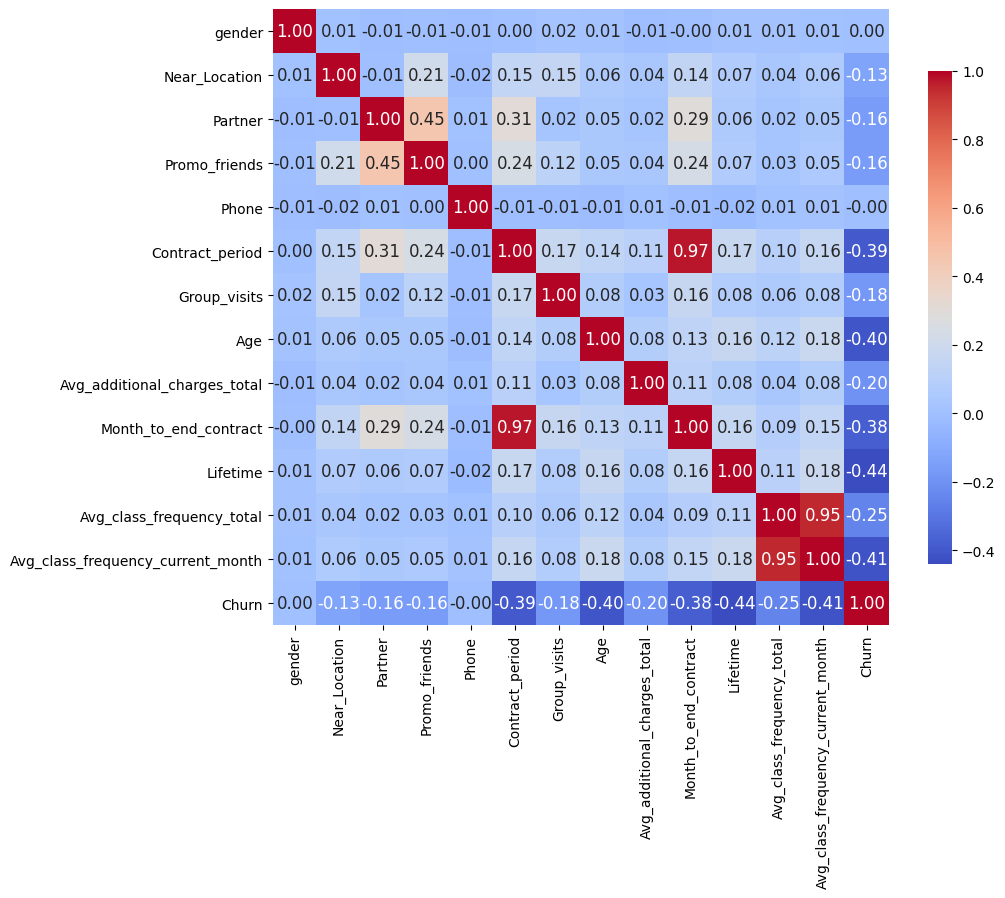

In [3]:
#Creating a correlation map 
cm = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))

# traza el mapa de calor anotado para la matriz de correlación
sb.heatmap(cm, annot=True, fmt=".2f", square=True, ax=ax, cmap="coolwarm", annot_kws={"size": 12}, cbar_kws={"shrink": .8})
ax.set_ylim(len(cm), 0)
plt.show()

**Comments:** 
According to the heatmap, our target variable doesn't have any correlation with gender and phone. But it has a high correlation with Lifetime (0.44), Average class frequency current month (0.41), Age (0.40), Contract Period (0.39) and Month to end contract (0.38). 


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Perfecto, buen trabajo con el despliegue de la matriz de correlación entre las características.  </div>

#### Exploratory Data Analysis for Canceled and Non-Canceled Groups

In [4]:
#Mean Values of Features for Canceled and Non-Canceled Groups
mean_values = df.groupby('Churn').mean()
mean_values

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Perfecto, buen trabajo explorando los valores medios de las características asociados al estado de cancelación de la suscripción de los clientes.   </div>

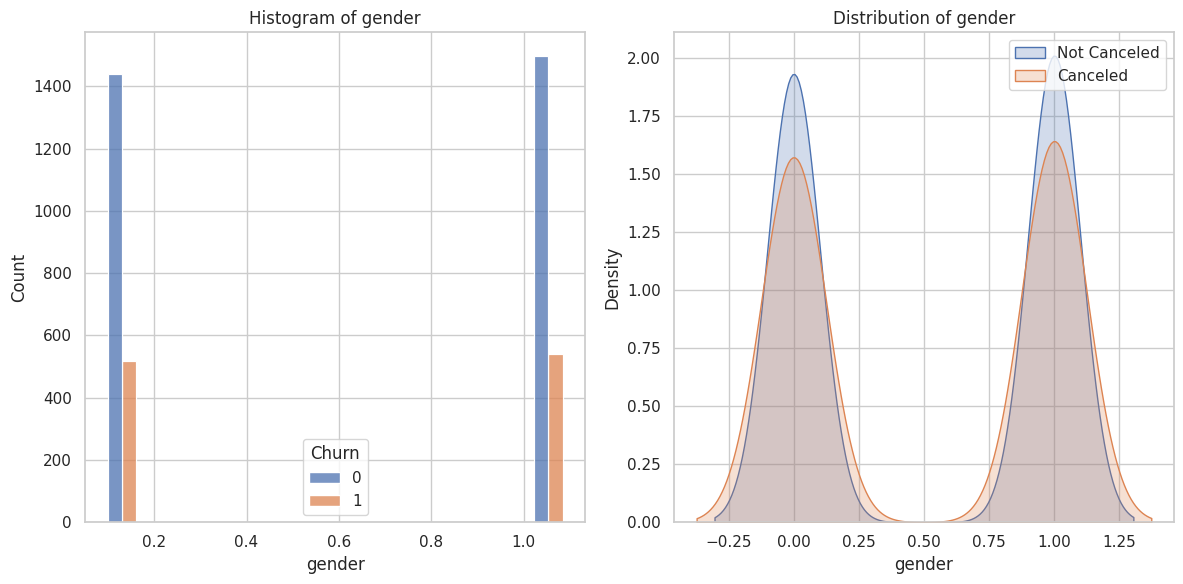

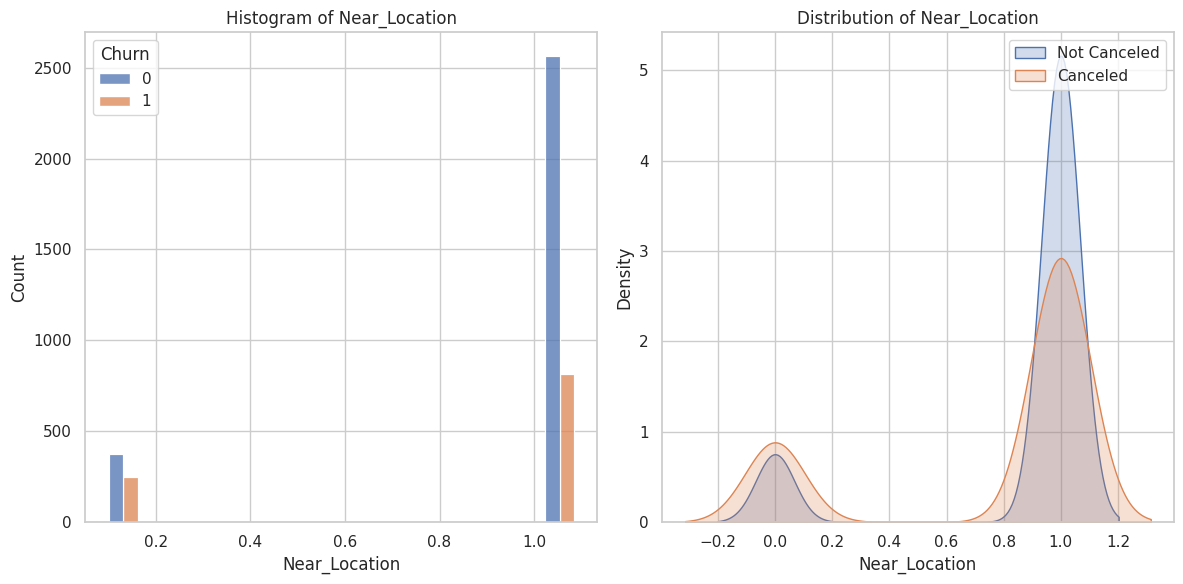

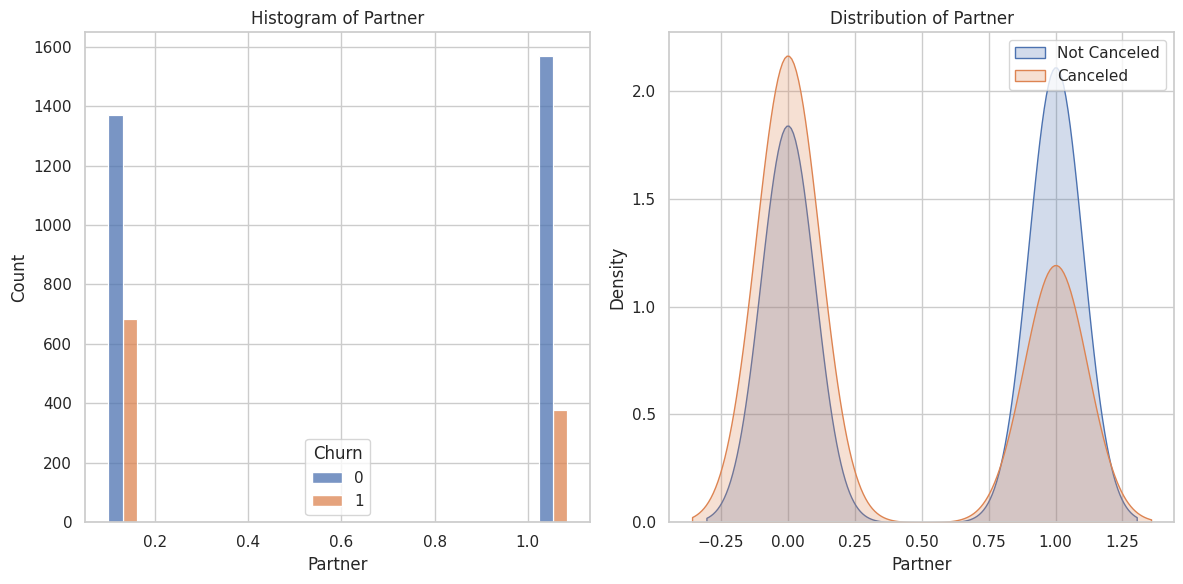

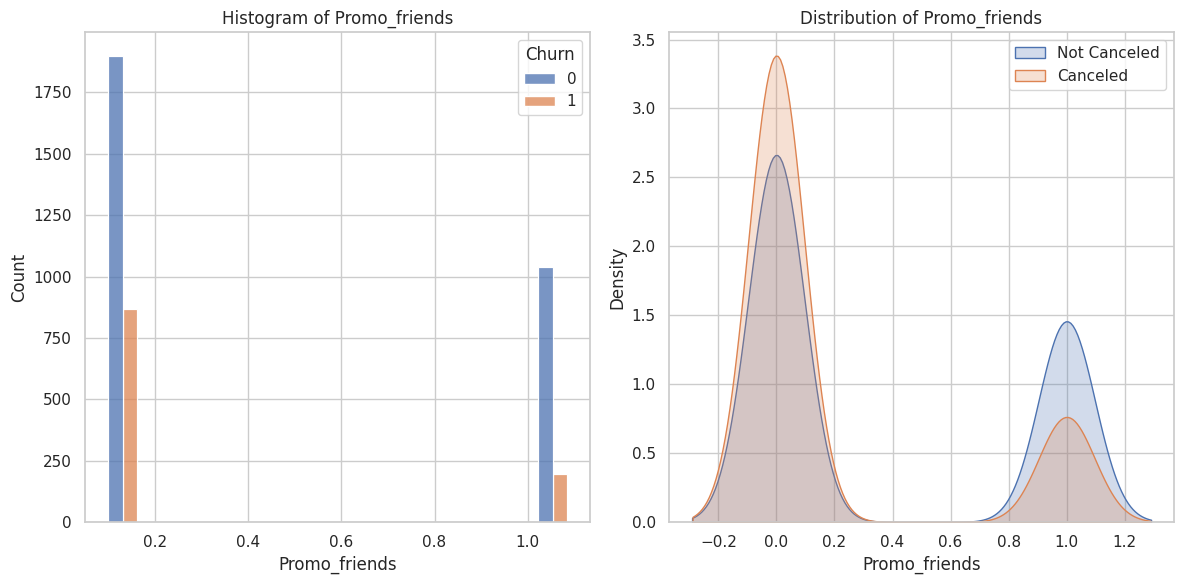

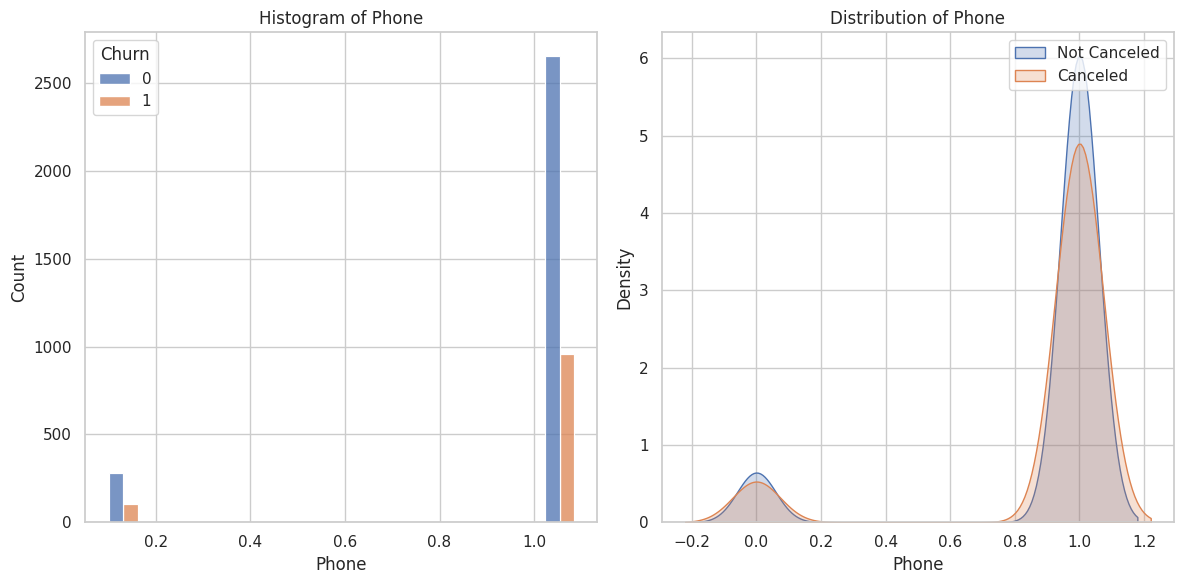

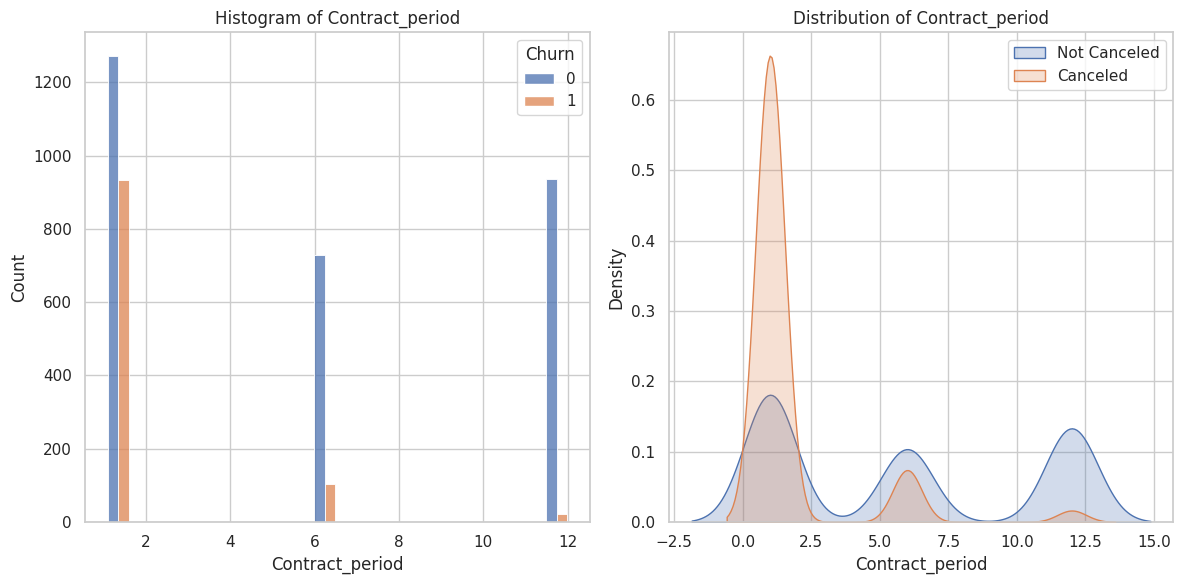

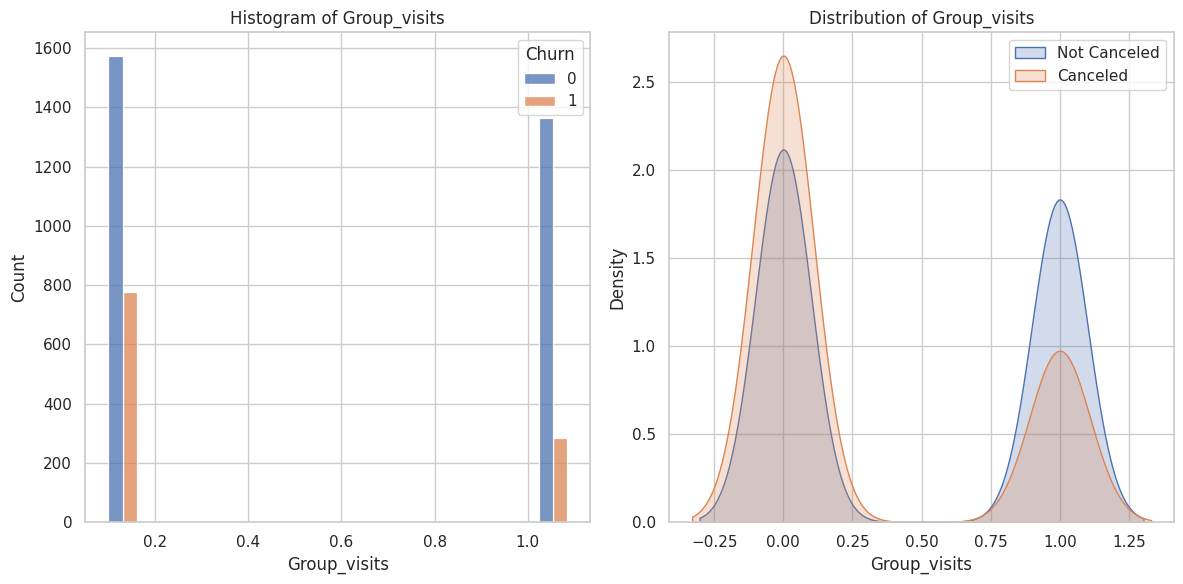

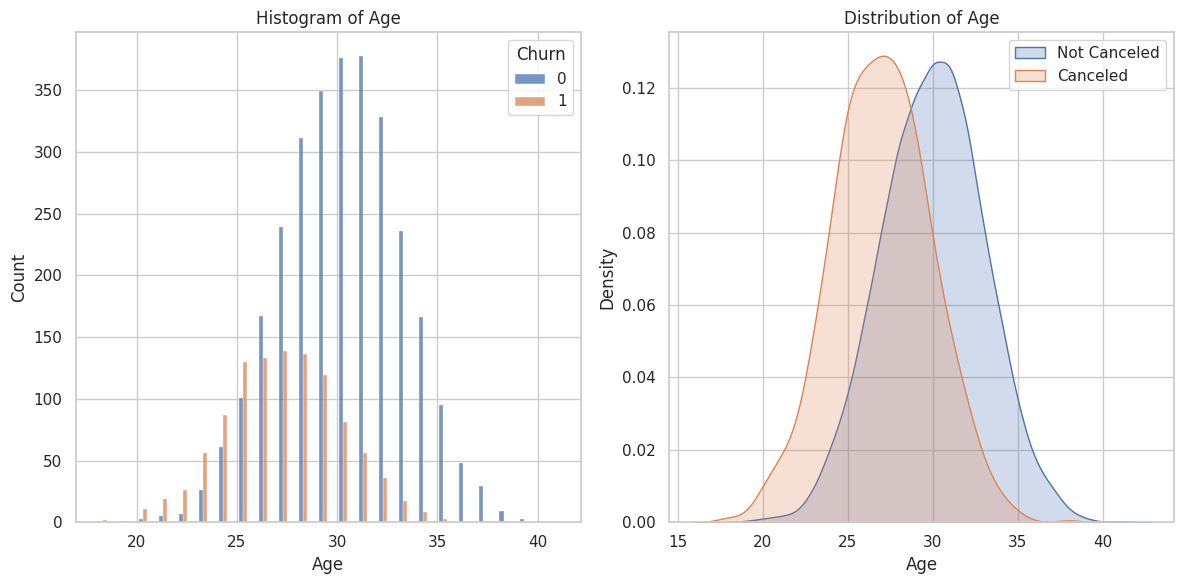

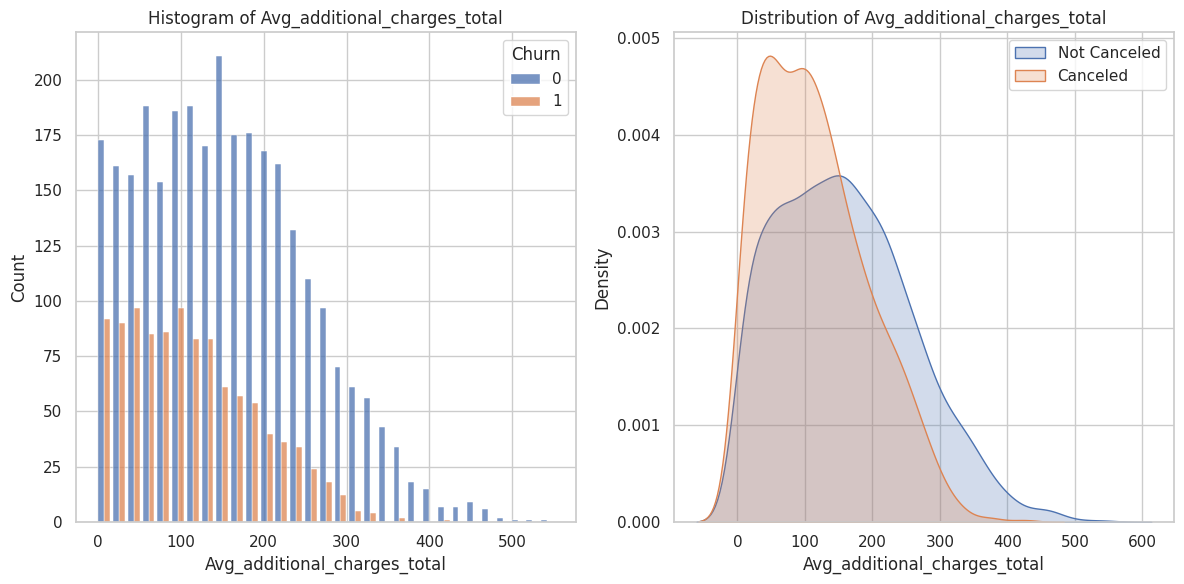

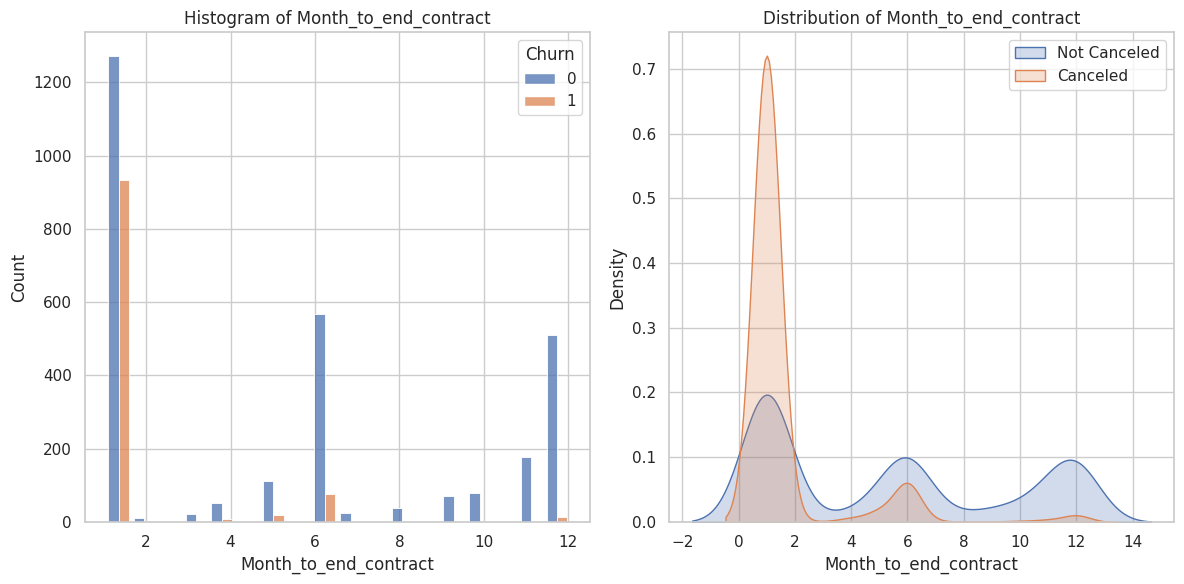

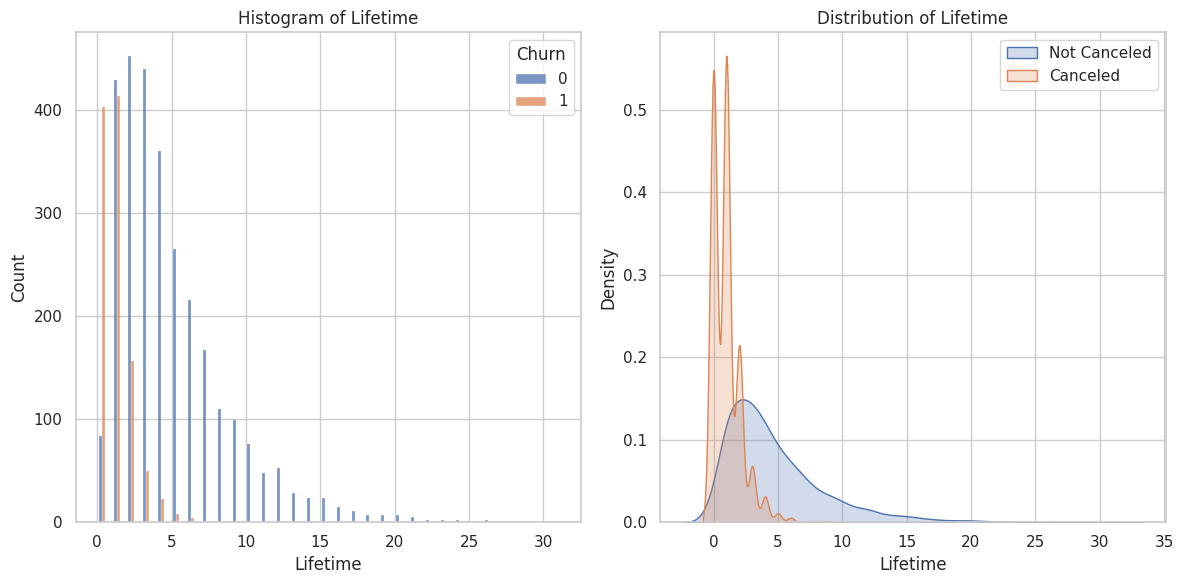

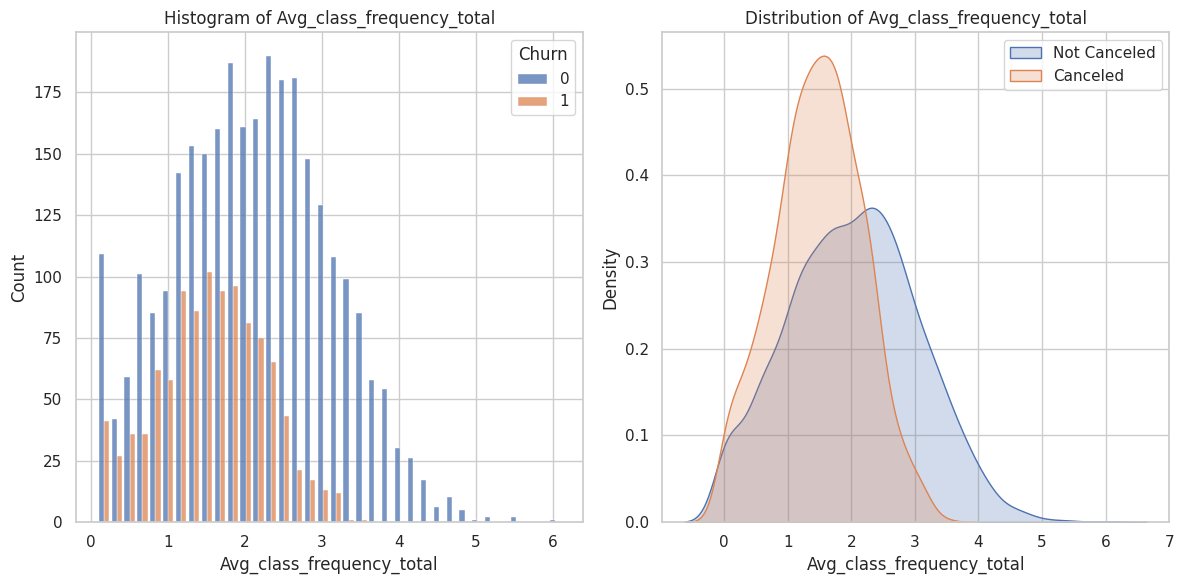

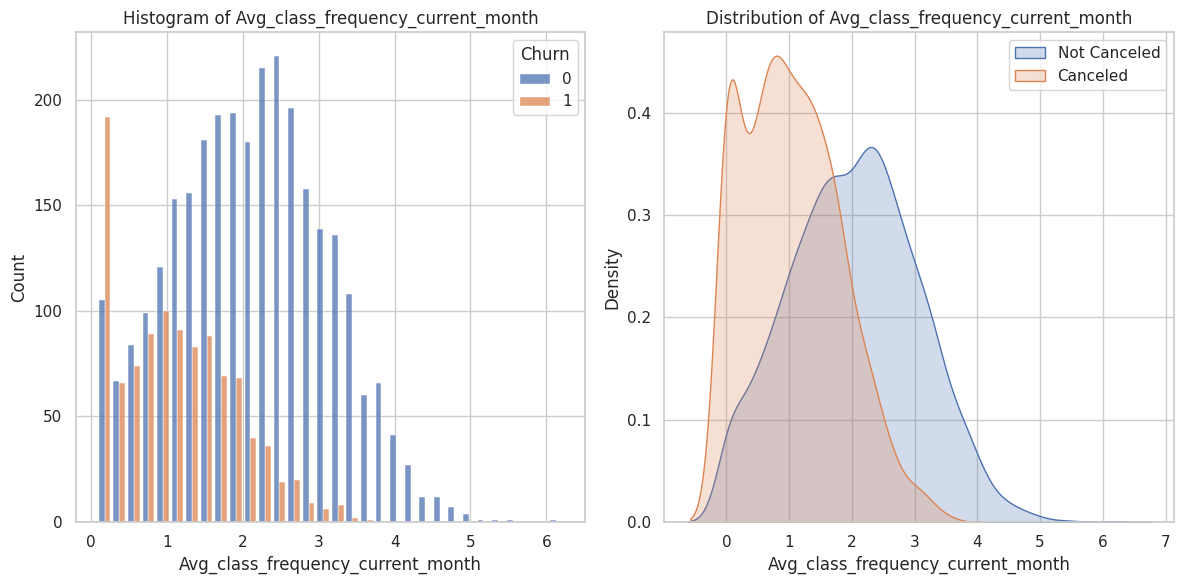

In [5]:
# Graphic's settings
sb.set(style="whitegrid")

# list of features excluding 'Churn' 
features = df.drop('Churn', axis=1).columns.tolist()

# Creating Histograms and Distributions for Features
for feature in features:
    plt.figure(figsize=(12, 6))

    # histograms
    plt.subplot(1, 2, 1)
    sb.histplot(data=df, x=feature, hue='Churn', multiple='dodge', shrink=.8)
    plt.title(f'Histogram of {feature}')

    # Distribution
    plt.subplot(1, 2, 2)
    sb.kdeplot(data=df[df['Churn'] == 0], x=feature, label='Not Canceled', fill=True)
    sb.kdeplot(data=df[df['Churn'] == 1], x=feature, label='Canceled', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()

    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Perfecto, buen trabajo desplegando los histogramas para estudiar las distribuciones de las características sujetas al estado de cancelación de los clientes.   </div>

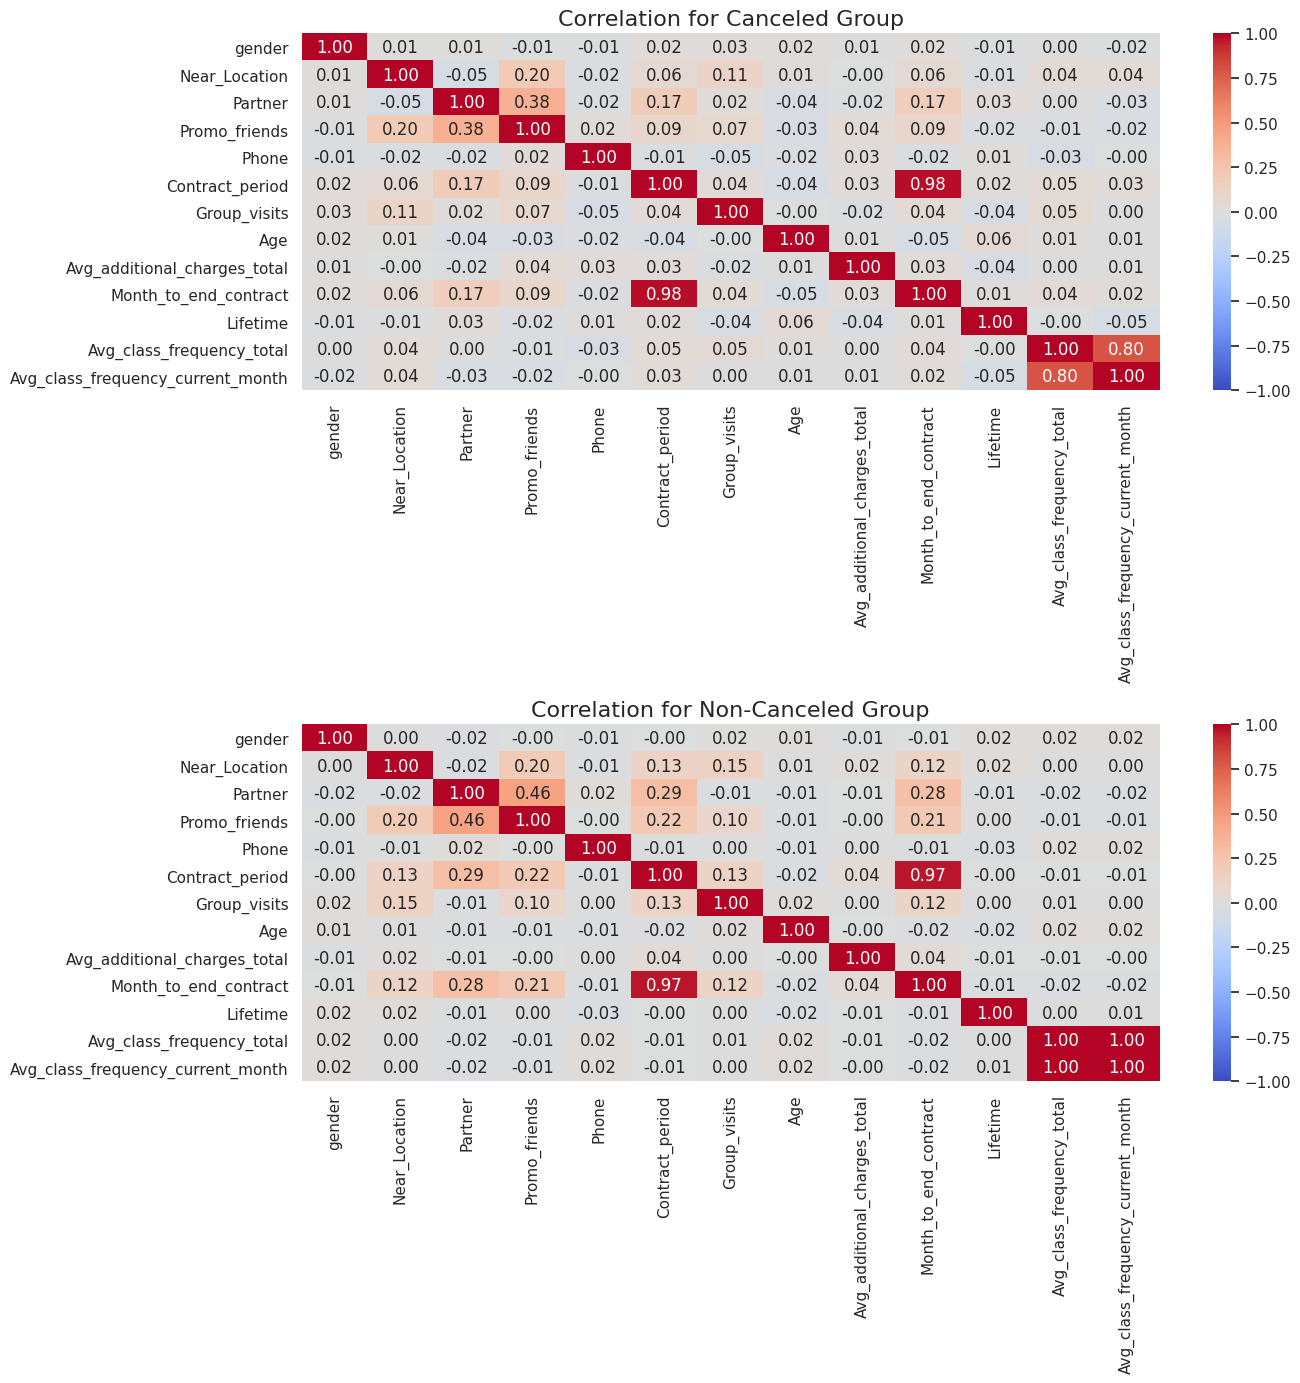

In [6]:
# Filtering the groups in caneceled and non-canceled
df_canceled = df[df['Churn'] == 1]
df_not_canceled = df[df['Churn'] == 0]

# Calculating the correlation matrix
corr_canceled = df_canceled.drop('Churn', axis=1).corr()
corr_not_canceled = df_not_canceled.drop('Churn', axis=1).corr()

# Plotting Heatmaps of the Correlation Matrix 
plt.figure(figsize=(14, 14)) 

# Heatmap for the canceled group
plt.subplot(2, 1, 1)
sb.heatmap(corr_canceled, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 12})
plt.title('Correlation for Canceled Group', fontsize=16)

# Heatmap for the non-canceled group
plt.subplot(2, 1, 2)
sb.heatmap(corr_not_canceled, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 12})
plt.title('Correlation for Non-Canceled Group', fontsize=16)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Interesante, buen trabajo, desplegando las dos matrices de correlación entre características sujeta al estado de cancelación de los clientes.  </div>

**Comments:**

It is necessary to highlight that gender wasn't analyzed because, as mentioned, we can't determine which numbers correspond to female and male, making it impossible to generate comments about it.

Following that, we can make some observations based on the data distribution:

* Clients who do not live near the gym have a higher chance of canceling their plan.
* Clients who work for an associated company have lower cancellation rates. However, the proportion of clients with this characteristic is only slightly higher than those without it, meaning the size of both groups is not significantly different.
* Clients who joined the gym through a promotional offer from a friend have lower cancellation chances, but this population isn't the largest.
* Clients with contracts shorter than 3 months have a higher likelihood of canceling their plan.
* There are more clients who do not participate in group classes, and this group has a higher cancellation rate.
* The age distribution does not provide particularly useful information.
* Cancellation rates increase for clients who are close to the end of their contract (within 2 months).
* The higher the number of visits by a client, the lower the chance of cancellation.

Regarding the correlation in the canceled group, 'month to end contract' and 'contract period' have a high correlation (0.98). Similarly, 'promo_friends' and 'partner' show a correlation of 0.38, while 'near_location' and 'promo_friends' have a correlation of 0.20.

However, in the case of the non-canceled group, we observe that 'partner' and 'promo_friends' have a higher correlation (0.46). Additionally, new correlations are found between 'partner' and 'contract period' (0.29), 'contract period' and 'promo_friends' (0.22), 'month to end contract' and 'partner' (0.28), and 'month to end contract' and 'promo_friends' (0.21).

ES: 

Es necesario destacar que no se analizó el género porque, como se mencionó, no podemos determinar qué números corresponden a femenino y masculino, lo que hace imposible generar comentarios al respecto.

Siguiendo esto, podemos hacer algunas observaciones basadas en la distribución de los datos:

* Los clientes que no viven cerca del gimnasio tienen una mayor probabilidad de cancelar su plan.
* Los clientes que trabajan para una empresa asociada tienen tasas de cancelación más bajas. Sin embargo, la proporción de clientes con esta característica es solo ligeramente superior a la de aquellos sin ella, lo que significa que el tamaño de ambos grupos no es significativamente diferente.
* Los clientes que se unieron al gimnasio a través de una oferta promocional de un amigo tienen menores probabilidades de cancelación, pero esta población no es la más grande.
* Los clientes con contratos más cortos de 3 meses tienen una mayor probabilidad de cancelar su plan.
* Hay más clientes que no participan en clases grupales, y este grupo tiene una tasa de cancelación más alta.
* La distribución de edades no proporciona información particularmente útil.
* Las tasas de cancelación aumentan para los clientes que están cerca del final de su contrato (dentro de los 2 meses).
* Cuanto mayor es el número de visitas de un cliente, menor es la probabilidad de cancelación.

En cuanto a la correlación en el grupo cancelado, "meses para el fin del contrato" y "período del contrato" tienen una alta correlación (0.98). De manera similar, "promo_friends" y "partner" muestran una correlación de 0.38, mientras que "near_location" y "promo_friends" tienen una correlación de 0.20.

Sin embargo, en el caso del grupo no cancelado, observamos que "partner" y "promo_friends" tienen una mayor correlación (0.46). Además, se encuentran nuevas correlaciones entre "partner" y "período del contrato" (0.29), "período del contrato" y "promo_friends" (0.22), "meses para el fin del contrato" y "partner" (0.28), y "meses para el fin del contrato" y "promo_friends" (0.21).


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Buen trabajo con el desarrollo de esta sección de comentarios.  </div>

### Machine Learning Model

In [7]:
# Separating features (X) y target variable (y)
X = df.drop(columns=['Churn'], axis = 1)
y = df['Churn']

# It divides the data in groups of training and validation
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)

# Scaling the data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Define models
models = [LogisticRegression(max_iter=1000, random_state=42), RandomForestClassifier(random_state=42)]

# Define a function to make predictions and print metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)

    
    print(f'{model.__class__.__name__} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# Evaluate each model
for model in models:
    make_prediction(model, X_train_st, y_train, X_test_st, y_test)

LogisticRegression - Accuracy: 0.92, Precision: 0.88, Recall: 0.80
RandomForestClassifier - Accuracy: 0.92, Precision: 0.86, Recall: 0.81



<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Perfecto, Natalia. Buen trabajo desplegando y evaluando la regresión logística y el Random Forest.  </div>

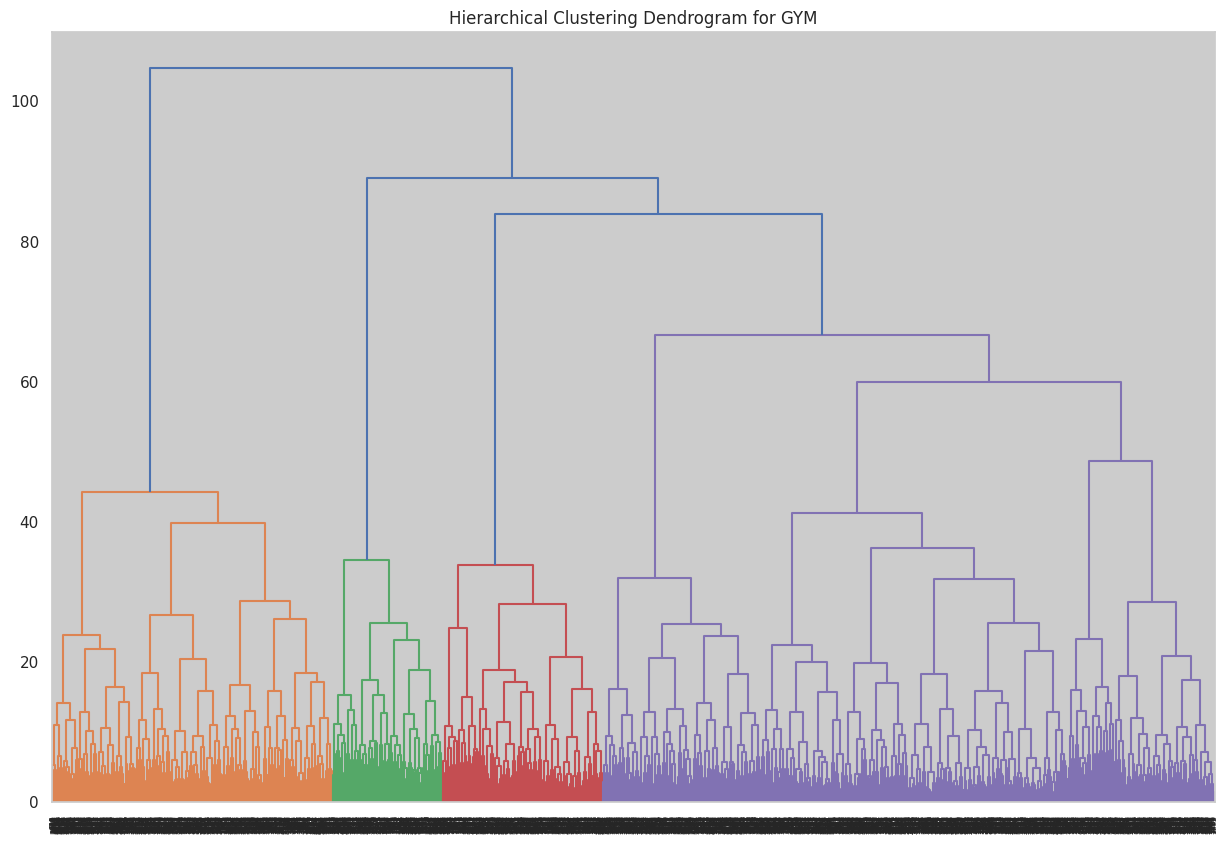

In [8]:
# Scale the entire dataset for clustering
x_sc = scaler.fit_transform(X)

# Define and fit KMeans
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(x_sc)

# Perform hierarchical clustering
linked = linkage(x_sc, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram for GYM')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Perfecto, buen trabajo desplegando el Dendongrama.  </div>

In [16]:
# Define and fit KMeans
km = KMeans(n_clusters=5, random_state=42)
labels = km.fit_predict(x_sc)

# Add the cluster labels to the DataFrame
df['cluster_km'] = labels

# Define cluster names
cluster_names = {
    0: "Remote Visitors",
    1: "Occasional Visitors",
    2: "High Risk",
    3: "Loyal Long-term",
    4: "Frequent Spenders"
}

# Map the cluster labels to the new names
df['cluster_km'] = df['cluster_km'].map(cluster_names)

# Compute mean values of features by cluster with the new names
cluster_means = df.groupby('cluster_km').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
Frequent Spenders,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
High Risk,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
Loyal Long-term,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
Occasional Visitors,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
Remote Visitors,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445


In [14]:
#compute and analyze the cancellation rate by cluster
cancellation_rate = df.groupby('cluster_km')['Churn'].mean().reset_index()
cancellation_rate

,cluster_km,Churn
0,Frequent Spenders,0.266839
1,High Risk,0.021965
2,Loyal Long-term,0.572942
3,Occasional Visitors,0.089989
4,Remote Visitors,0.246445


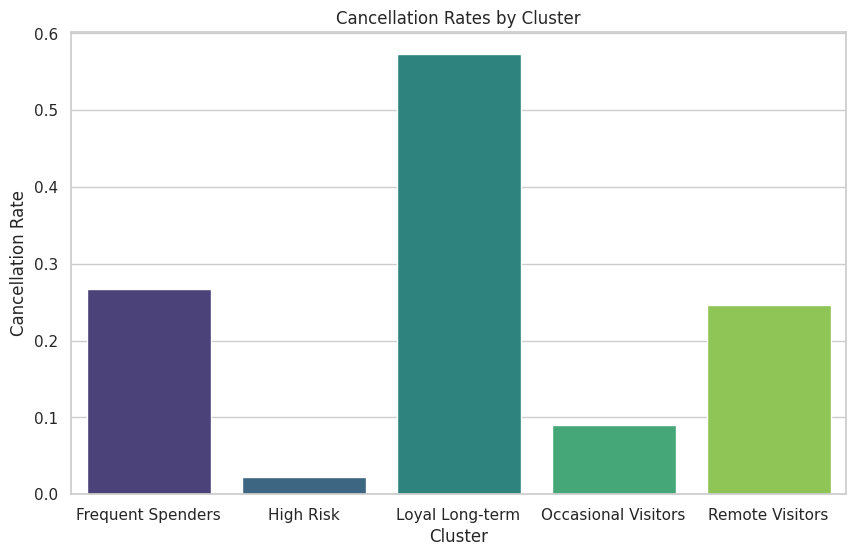

In [15]:
# Plot
plt.figure(figsize=(10, 6))
sb.barplot(x='cluster_km', y='Churn', data=cancellation_rate, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates by Cluster')
plt.show()

**Comments:**
* **Remote Visitors:** clients who aren't near the location and have a moderate churn rate.
* **Occasional Visitors:** Members who don't provide phone numbers and have a moderate churn rate.
* **High Risk:** Members that have the highest churn rate, are near the location, have shorter contract periods, and lower class attendance.
* **Frequent Spenders:** Members who have high additional charges, frequent class attendance, and a low churn rate.
* **Loyal Long-Term:** Clients who are more committed (longer contract periods, higher lifetime, frequent class attendance) and have the lowest churn rate.

It's important to highlight a few points: Being near the location doesn’t necessarily guarantee lower churn rates; however, it could be useful to design attractive strategies or promotions for people who live far away. On the other hand, longer contract periods and frequent class attendance are associated with lower churn rates. Based on this, we could say that focusing on increasing class attendance and extending contract periods can help to reduce churn rates.   

ES: 
* **Visitantes Remotos/ Remote Visitors:** clientes que no están cerca de la ubicación y tienen una tasa de deserción moderada.
* **Visitantes Ocasionales / Occasional Visitors:** miembros que no proporcionan números de teléfono y tienen una tasa de deserción moderada.
* **Alto Riesgo / High Risk:** miembros que tienen la tasa de deserción más alta, están cerca de la ubicación, tienen períodos de contrato más cortos y menor asistencia a clases.
* **Gastadores Frecuentes / Frequent Spenders:** miembros que tienen altos cargos adicionales, asistencia frecuente a clases y una baja tasa de deserción.
* **Leales a Largo Plazo / Loyar long term:** clientes que están más comprometidos (períodos de contrato más largos, mayor tiempo de vida y asistencia frecuente a clases) y tienen la tasa de deserción más baja.

Es importante resaltar algunos puntos: estar cerca de la ubicación no garantiza necesariamente tasas de deserción más bajas; sin embargo, podría ser útil diseñar estrategias o promociones atractivas para las personas que viven lejos. Por otro lado, los períodos de contrato más largos y la asistencia frecuente a clases están asociados con tasas de deserción más bajas. Basándonos en esto, podríamos decir que centrarse en aumentar la asistencia a clases y extender los períodos de contrato puede ayudar a reducir las tasas de deserción.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Interesante, buen trabajo desplegando y estudiando los resultados del algoritmo de clustering. Me parece un buen detalle el de generar unos nombres para los clúster asociados a características como el cálculo de la tasa de cancelación.  </div>

**General Conclusions:**

Regarding the exploratory data analysis, we did not encounter significant issues. In general, there were no missing data, and the dataset comprised numerical information. The categorical variables, such as phone, gender, and distance, were classified as 0 or 1, with 0 meaning "No" and 1 meaning "Yes."

Gender was not considered in the analysis because we lacked sufficient information to determine which number corresponded to female and male.

Now, regarding the conclusions, most clients are highly committed, meaning they have long contract periods, a high lifetime value, and frequent attendance, coupled with a low churn rate. This is a very positive indicator for the gym.

However, we have a significant group of clients who live far away from the gym. Although being near the location doesn’t necessarily guarantee lower churn rates, motivating people who live far away can be useful in reducing cancellations. In this case, a good marketing strategy is essential for proper outreach. Perhaps creating a promotion scheme based on the distance from the gym could be attractive. This promotion could consider the cost of public transportation to determine the discount amount.

Another strategy that could work is offering promotions and benefits for people who sign long-term contracts from the beginning. For instance, offering a lower fee for the first year or access to exclusive gym services for those with a year-long contract could be effective.

Finally, there is a high correlation between attendance at group activities and low churn rates. Therefore, effective marketing strategies are also crucial here. Additionally, considering the schedules of people who visit the gym and the timings of the classes could be useful. It might be helpful to analyze the number of people who visit the gym during hours when no classes are offered and see if adjustments can be made.

ES: 

En cuanto al análisis exploratorio de datos, no encontramos problemas significativos. En general, no había datos faltantes, y el conjunto de datos estaba compuesto por información numérica. Las variables categóricas, como teléfono, género y distancia, se clasificaron como 0 o 1, donde 0 significa "No" y 1 significa "Sí."

El género no se consideró en el análisis porque no teníamos suficiente información para determinar qué número correspondía a femenino y masculino.

Ahora, en cuanto a las conclusiones, la mayoría de los clientes están altamente comprometidos, lo que significa que tienen períodos de contrato largos, un alto valor de vida útil y asistencia frecuente, junto con una baja tasa de deserción. Esto es un indicador muy positivo para el gimnasio.

Sin embargo, tenemos un grupo significativo de clientes que viven lejos del gimnasio. Aunque estar cerca de la ubicación no garantiza necesariamente tasas de deserción más bajas, motivar a las personas que viven lejos puede ser útil para reducir las cancelaciones. En este caso, una buena estrategia de marketing es esencial para una difusión adecuada. Tal vez crear un esquema de promociones basado en la distancia del gimnasio podría ser atractivo. Esta promoción podría considerar el costo del transporte público para determinar el monto del descuento.

Otra estrategia que podría funcionar es ofrecer promociones y beneficios para las personas que firman contratos a largo plazo desde el principio. Por ejemplo, ofrecer una tarifa más baja para el primer año o acceso a servicios exclusivos del gimnasio para aquellos con un contrato de un año podría ser efectivo.

Finalmente, hay una alta correlación entre la asistencia a actividades grupales y las bajas tasas de deserción. Por lo tanto, las estrategias de marketing efectivas también son cruciales aquí. Además, considerar los horarios de las personas que visitan el gimnasio y los horarios de las clases podría ser útil, por ejemplo analizar la cantidad de personas que visitan el gimnasio durante las horas en que no se ofrecen clases y ver si se pueden hacer ajustes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
     
Buen trabajo con el desarrollo de la sección de conclusiones generales.  </div>